In [205]:
import pandas as pd
from pathlib import Path
import numpy as np
import math
import scipy
from scipy.signal import find_peaks
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd 

In [206]:
file_path_london_aadf = 'Downloads/dft_aadf_region_id_6.csv'
file_path_london_aadf_direction = 'Downloads/dft_aadfbydirection_region_id_6.csv'
file_path_london_countpoints = 'Downloads/dft_countpoints_region_id_6.csv'
file_path_london_rawcount = 'Downloads dft_rawcount_region_id_6.csv'
file_path_london_road_type = 'Downloads/dft_traffic_road_type_region_id_6.csv'
file_path_london_vehicletype = 'Downloads/dft_traffic_vehicle_type_region_id_6.csv'

df_traffic = pd.read_csv(file_path_london_aadf)

df_traffic

,count_point_id,year,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,6750,2014,6,London,96,Islington,A201,Major,Swinton St,Pentonville Rd,...,787,1728,204,74,132,15,6,18,449,11916
1,8352,2014,6,London,104,Lewisham,A2,Major,A20,A20,...,430,1415,258,36,58,6,11,22,390,9426
2,6807,2014,6,London,178,Kingston upon Thames,A240,Major,A3210,A307,...,175,1589,251,35,13,2,4,19,325,12951
3,27765,2014,6,London,57,Barnet,A5109,Major,Barnet Lane,A1000/A109,...,302,1651,246,12,12,0,1,1,273,19276
4,8488,2014,6,London,104,Lewisham,A20,Major,A20 Amersham Rd,A2 Parkfield Rd,...,656,1617,286,83,27,5,8,7,415,12821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50184,37106,2022,6,London,66,Hillingdon,A404,Major,LA Boundary,A4180,...,447,1672,211,42,43,9,7,6,318,16531
50185,17099,2022,6,London,66,Hillingdon,A437,Major,A4(T),A312,...,553,1628,120,17,5,1,13,5,162,15900
50186,17024,2022,6,London,66,Hillingdon,A408,Major,A4,A3044,...,248,687,75,3,3,4,0,12,97,6503
50187,37713,2022,6,London,66,Hillingdon,A4007,Major,LA Boundary,A4020/A408,...,121,2078,364,78,24,5,66,53,589,12357


In [208]:
areas_inside_congestion_zone = ["Westminster", "Lambeth", "Southwark", "City of London",
                                 "Tower Hamlets", "Islington", "Camden"]

roads_to_remove = ["A501", "A40", "A5", "A4202", "A4", "A302", "A3204", "A3", "A201", 
                   "Tower Bridge Rd", "A100", "A1210", "Great Eastern St"]

In [210]:
df_congestion = df_traffic[df_traffic["local_authority_name"].isin(areas_inside_congestion_zone)]
df_congestion_new = df_congestion[~df_congestion["road_name"].isin(roads_to_remove)]

In [212]:

data_new = df_congestion.groupby("local_authority_name")["all_motor_vehicles"].sum().reset_index()

fig = px.bar(data_new, y="local_authority_name", x="all_motor_vehicles", orientation="h", 
             labels={"all_motor_vehicles": "Total Motor Vehicles", "local_authority_name": "Local Authority"})
fig.update_layout(autosize=False,
    width=1000,
    height=500,)

fig.show()


In [214]:
# Assuming df_traffic is your DataFrame
data_new = df_congestion_new.groupby(["local_authority_name", "year"])["all_motor_vehicles"].sum().reset_index()

fig = px.bar(data_new, x="year", y="all_motor_vehicles", color="local_authority_name",
             labels={"all_motor_vehicles": "Total Motor Vehicles", "year": "Year"})
fig.update_layout(autosize=False,
    width=1000,
    height=500,)

fig.show()

In [216]:
# df that contains year-over-year changes from 2000-2021 in all the 7 boroughs

km_travelled_filepath = 'Downloads/traffic-flow-borough_total all zone.csv'

with open(km_travelled_filepath,'r') as file:
    km_travelled = pd.read_csv(km_travelled_filepath)


km_rows = km_travelled[km_travelled['Local Authority'].isin(['Total in zone'])]

km_columns = km_rows.iloc[:,[1] + list(range(9,31))]

new_km_travelled = km_columns

new_km_travelled 

,Local Authority,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
52,Total in zone,4015.00,3954.00,3911.00,3778.00,3701.00,3620.00,3628.00,3582.00,3462.00,...,3135.00,3086.00,3114.00,3121.00,3109.00,3087.00,3022.00,3026.00,2394.00,2664.00


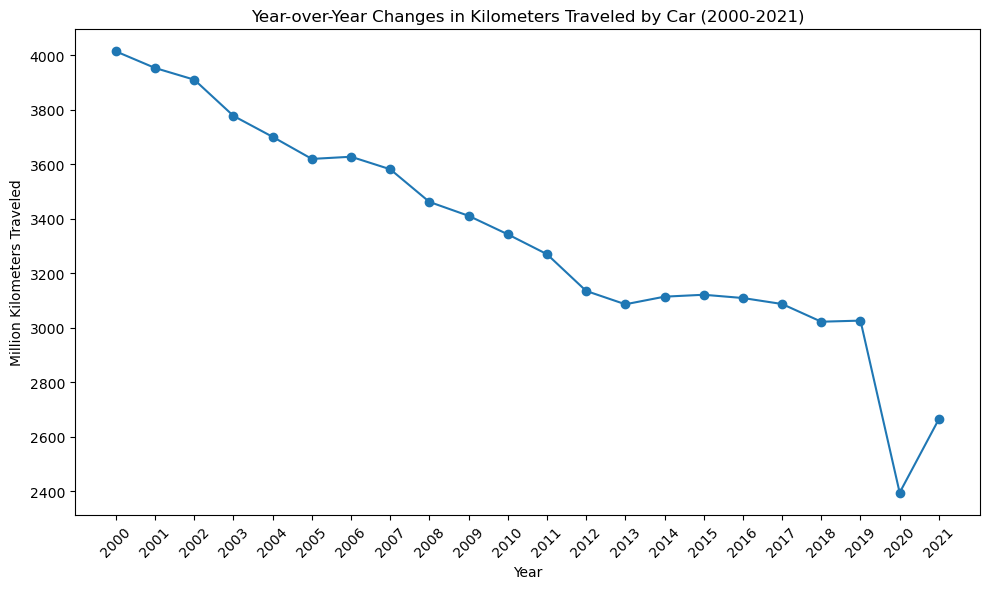

In [204]:
km_travelled_filepath = 'Downloads/traffic-flow-borough_total all zone.csv'

with open(km_travelled_filepath,'r') as file:
    km_travelled = pd.read_csv(km_travelled_filepath)


km_rows = km_travelled[km_travelled['Local Authority'].isin(['Total in zone'])]

km_columns = km_rows.iloc[:,[1] + list(range(9,31))]

new_km_travelled = km_columns


import matplotlib.pyplot as plt

# Data
years = list(new_km_travelled.columns[1:])
values = new_km_travelled.iloc[0, 1:].values.astype(float)   # Convert kilometers to million kilometers

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', linestyle='-')
plt.title('Year-over-Year Changes in Kilometers Traveled by Car (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Million Kilometers Traveled')
#plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



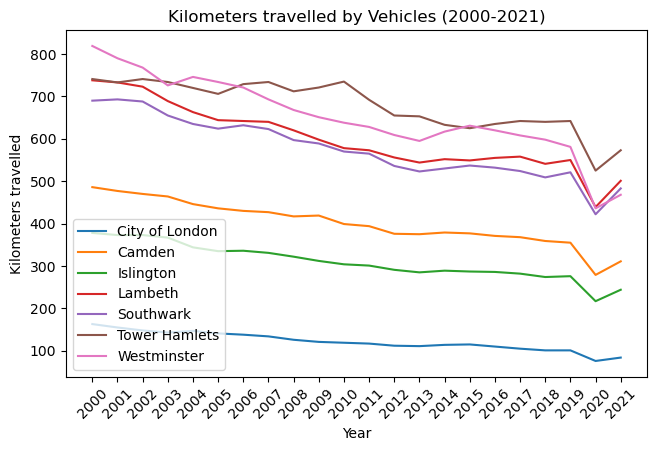

In [13]:
years = new_km_travelled.columns[1:]  
authorities = new_km_travelled.iloc[:, 0]

plt.figure(figsize=(7.5, 4.5)) 
for authority in authorities:
    kilometers_travelled = new_km_travelled [new_km_travelled ['Local Authority'] == authority].iloc[:, 1:].values[0].astype(float)
    plt.plot(years, kilometers_travelled, label=authority)

plt.xlabel("Year")
plt.ylabel("Kilometers travelled")
plt.title("Kilometers travelled by Car (2000-2021)")
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [14]:
# df that contains the sums of kms travelled for the 6 time periods

km_travelled['2000-2002'] = km_travelled[['2000', '2001', '2002']]\
    .apply(pd.to_numeric, errors='coerce').sum(axis=1) / 3
km_travelled['2003-2004'] = km_travelled[['2003', '2004']]\
    .apply(pd.to_numeric, errors='coerce').sum(axis=1) /2
km_travelled['2005-2010'] = km_travelled[['2005', '2006', '2007', '2008', '2009', '2010']]\
    .apply(pd.to_numeric, errors='coerce').sum(axis=1) /6
km_travelled['2011-2013'] = km_travelled[['2011', '2012', '2013']]\
    .apply(pd.to_numeric, errors='coerce').sum(axis=1) /3
km_travelled['2014-2019'] = km_travelled[['2014', '2015', '2016', '2017', '2018', '2019']]\
    .apply(pd.to_numeric, errors='coerce').sum(axis=1) /6
km_travelled['2020-2021'] = km_travelled[['2020', '2021']]\
    .apply(pd.to_numeric, errors='coerce').sum(axis=1) /2


km_rows = km_travelled[km_travelled['Local Authority'].isin(['Westminster','Lambeth','Southwark','City of London',\
           'Tower Hamlets','Islington','Camden'])]

km_columns_sums = km_rows.iloc[:,[1] + list(range(146,152))]

sums_km_travelled = km_columns_sums

sums_km_travelled

,Local Authority,2000-2002,2003-2004,2005-2010,2011-2013,2014-2019,2020-2021
1,City of London,155.333333,145.0,129.833333,113.333333,107.666667,80.0
7,Camden,477.666667,455.0,421.333333,381.666667,368.166667,295.0
19,Islington,374.666667,355.5,323.333333,292.333333,282.333333,230.5
22,Lambeth,731.333333,676.0,620.333333,557.666667,550.833333,470.0
28,Southwark,690.333333,645.0,605.833333,541.333333,525.500000,452.5
30,Tower Hamlets,738.333333,727.0,722.833333,666.666667,636.166667,549.0
33,Westminster,792.333333,736.0,684.166667,610.666667,609.166667,452.0


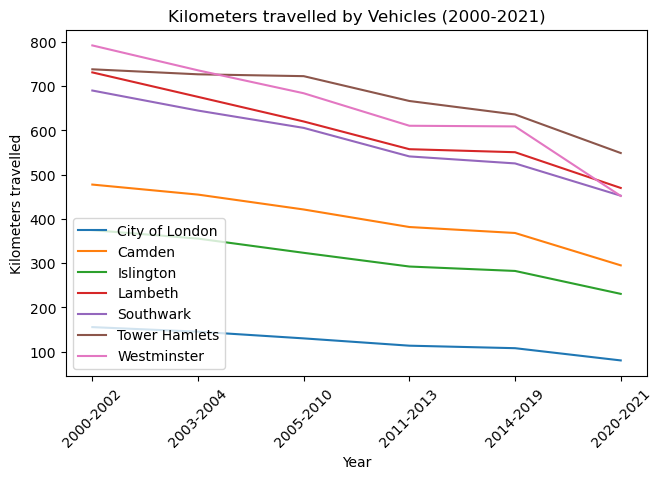

In [15]:
years = sums_km_travelled.columns[1:]  
authorities = sums_km_travelled.iloc[:, 0]

plt.figure(figsize=(7.5, 4.5)) 
for authority in authorities:
    kilometers_travelled = sums_km_travelled[sums_km_travelled['Local Authority'] == authority].iloc[:, 1:].values[0]
    plt.plot(years, kilometers_travelled, label=authority)

plt.xlabel("Year")
plt.ylabel("Kilometers travelled")
plt.title("Kilometers travelled by Vehicles (2000-2021)")
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [16]:
# df of London population up to 2011

london_population_filepath = 'Downloads/census-historic-population-borough.csv'

with open(london_population_filepath,'r') as file:
    london_population = pd.read_csv(london_population_filepath)
    

london_rows = london_population[london_population\
                                ['Area Name'].isin(['Westminster','Lambeth','Southwark','City of London',\
                                                    'Tower Hamlets','Islington','Camden'])]

london_columns = london_rows.iloc[:,[1] + list(range(21,24))]

new_london_population = london_columns

new_london_population

# data source: https://data.london.gov.uk/dataset/historic-census-population

,Area Name,Persons-1991,Persons-2001,Persons-2011
0,City of London,4230,7181,7375
6,Camden,165274,198022,220338
18,Islington,154873,175789,206125
21,Lambeth,220252,266170,303086
27,Southwark,198916,244867,288283
29,Tower Hamlets,153255,196083,254096
32,Westminster,177743,181284,219396


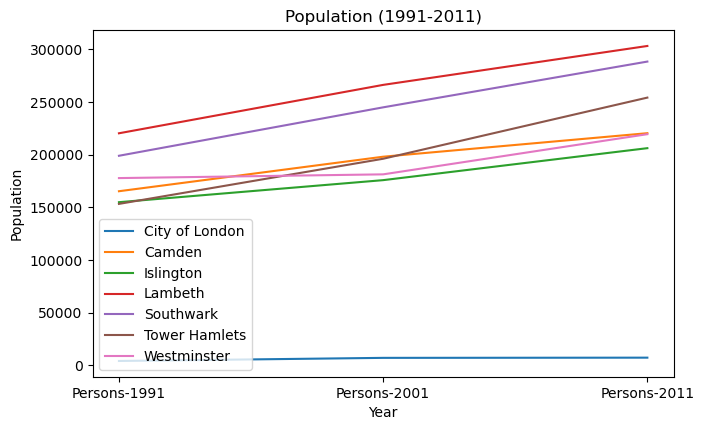

In [17]:
years = new_london_population.columns[1:]  
authorities = new_london_population.iloc[:, 0]

plt.figure(figsize=(7.5, 4.5)) 
for authority in authorities:
    kilometers_travelled = new_london_population[new_london_population['Area Name'] == authority].iloc[:, 1:].values[0]
    plt.plot(years, kilometers_travelled, label=authority)

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population (1991-2011)")
plt.legend()

plt.show()

In [20]:
# df of London population in 2021

add_pop_filepath = 'Downloads/londonpopulation2021.csv'

with open(add_pop_filepath, 'rb') as file:
    add_pop = pd.read_csv(add_pop_filepath, encoding='ISO-8859-1')

add_rows = add_pop[add_pop['Area name'].isin(['Westminster', 'Lambeth', 'Southwark', 'City of London',
                                              'Tower Hamlets', 'Islington', 'Camden'])]
add_columns = add_rows[['Area name', 'Population 2021']]

new_add_pop = add_columns.rename(columns={'Area name': 'Area Name', 'Population 2021': 'Persons-2021'})

new_add_pop['Persons-2021'] = new_add_pop['Persons-2021'].str.replace(',', '')

new_add_pop

# data source: https://www.ons.gov.uk/visualisations/censusareachanges/E09000001

,Area Name,Persons-2021
288,City of London,8583
294,Camden,210136
306,Islington,216589
309,Lambeth,317654
315,Southwark,307637
317,Tower Hamlets,310306
320,Westminster,204236


In [21]:
combined_pop = new_london_population.merge(new_add_pop, on='Area Name')

combined_pop

,Area Name,Persons-1991,Persons-2001,Persons-2011,Persons-2021
0,City of London,4230,7181,7375,8583
1,Camden,165274,198022,220338,210136
2,Islington,154873,175789,206125,216589
3,Lambeth,220252,266170,303086,317654
4,Southwark,198916,244867,288283,307637
5,Tower Hamlets,153255,196083,254096,310306
6,Westminster,177743,181284,219396,204236


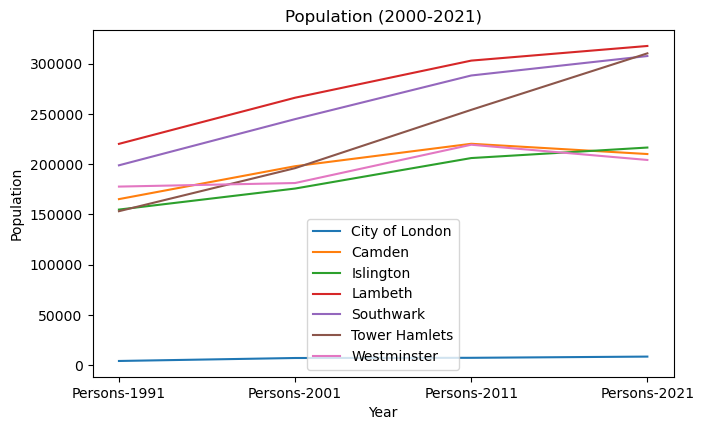

In [22]:
years = combined_pop.columns[1:]  
authorities = combined_pop.iloc[:, 0]


plt.figure(figsize=(7.5, 4.5)) 
for authority in authorities:
    kilometers_travelled = combined_pop[combined_pop['Area Name'] == authority].iloc[:, 1:].values[0]
    plt.plot(years, kilometers_travelled, label=authority)

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population (2000-2021)")

plt.legend()


plt.show()